### Import de bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Tradução de headers e leitura de CSV

In [2]:
#Novos nomes das colunas
headers = ["ID", "filial", "cidade", "tipo_cliente", "genero", "linha_de_produto", "preco_unitario", "quantidade", "taxa_5%", "total", "data", "hora", "forma_pagamento", "custo_produtos", "porcentagem_margem_bruta", "renda_bruta", "avaliacao"]

#Importar CSV
df = pd.read_csv("supermarket_sales.csv", names = headers, header = 0)


### Análise inicial do dataset

In [3]:
#Primeiras linhas do CSV
df.head()

,ID,filial,cidade,tipo_cliente,genero,linha_de_produto,preco_unitario,quantidade,taxa_5%,total,data,hora,forma_pagamento,custo_produtos,porcentagem_margem_bruta,renda_bruta,avaliacao
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
#Informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        1000 non-null   object 
 1   filial                    1000 non-null   object 
 2   cidade                    1000 non-null   object 
 3   tipo_cliente              1000 non-null   object 
 4   genero                    1000 non-null   object 
 5   linha_de_produto          1000 non-null   object 
 6   preco_unitario            1000 non-null   float64
 7   quantidade                1000 non-null   int64  
 8   taxa_5%                   1000 non-null   float64
 9   total                     1000 non-null   float64
 10  data                      1000 non-null   object 
 11  hora                      1000 non-null   object 
 12  forma_pagamento           1000 non-null   object 
 13  custo_produtos            1000 non-null   float64
 14  porcentag

In [5]:
#Quantidade de linhas e colunas
df.shape

(1000, 17)

In [6]:
#Verificar se há NA
df.isna().sum()

ID                          0
filial                      0
cidade                      0
tipo_cliente                0
genero                      0
linha_de_produto            0
preco_unitario              0
quantidade                  0
taxa_5%                     0
total                       0
data                        0
hora                        0
forma_pagamento             0
custo_produtos              0
porcentagem_margem_bruta    0
renda_bruta                 0
avaliacao                   0
dtype: int64

### Indicadores

In [7]:
#Venda por cidade
df.groupby("cidade")["total"].sum()

cidade
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: total, dtype: float64

In [8]:
#Média por cidade
df.groupby("cidade")["avaliacao"].mean()

cidade
Mandalay     6.818072
Naypyitaw    7.072866
Yangon       7.027059
Name: avaliacao, dtype: float64

In [9]:
#Contagem dos tipos de compradores ('Customer type')
tipos_consumidores = df["tipo_cliente"].value_counts()
tipos_consumidores

Member    501
Normal    499
Name: tipo_cliente, dtype: int64

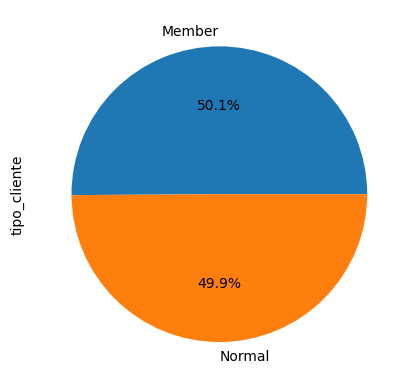

In [10]:
tipos_consumidores.plot(kind="pie", autopct='%.1f%%');

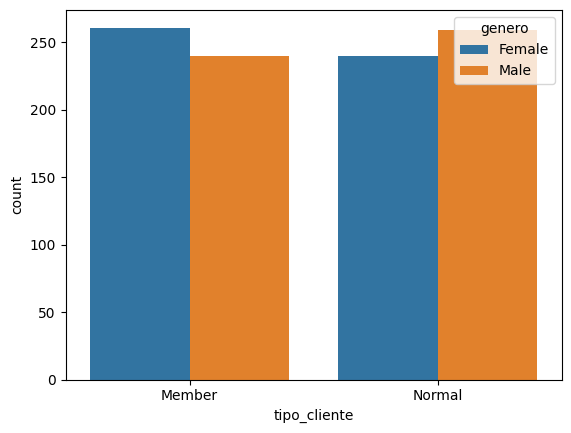

In [11]:
fig = sns.countplot(data=df, x='tipo_cliente', hue='genero')

In [12]:
#Quantidade de produtos vendidos por departamento ('Product line')
df.groupby("linha_de_produto")["quantidade"].sum()

linha_de_produto
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: quantidade, dtype: int64

<AxesSubplot: xlabel='linha_de_produto', ylabel='quantidade'>

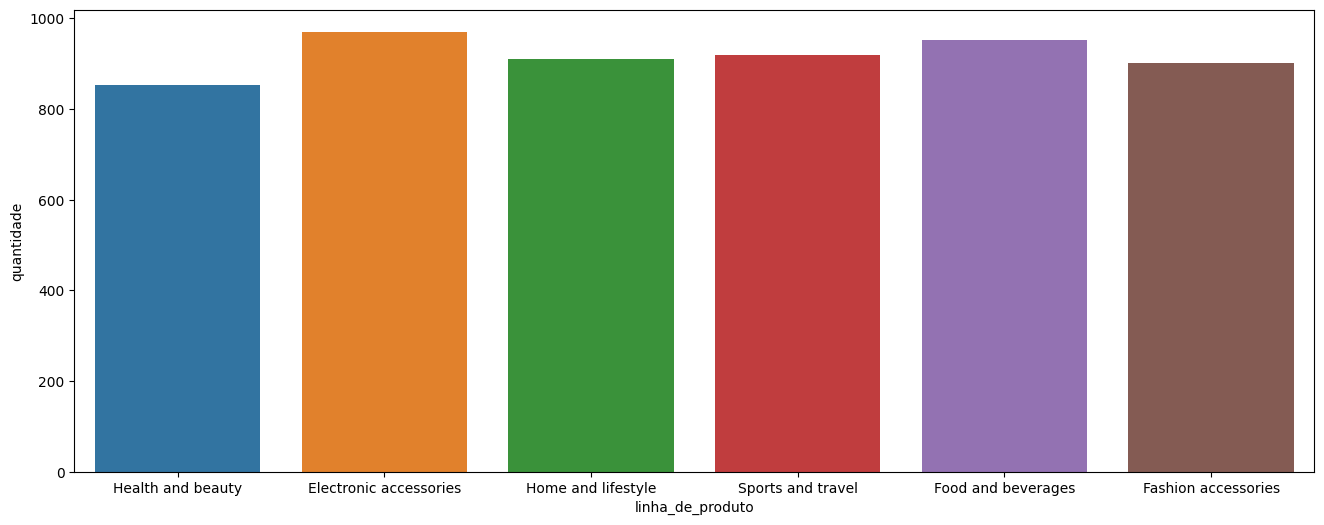

In [13]:
# Quantidade de itens vendidos por linha de produto
plt.subplots(figsize=(16,6))
sns.barplot(data=df, 
            x="linha_de_produto", 
            y="quantidade", 
            estimator="sum", 
            errorbar=None)    

<AxesSubplot: xlabel='filial', ylabel='total'>

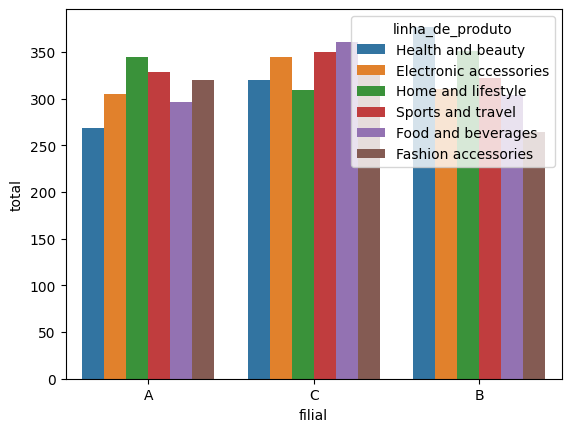

In [14]:
# Total de vendas por linha de produto por filial
sns.barplot(data=df,
            y='total',
            x='filial',
            hue="linha_de_produto", 
            errorbar=None)

In [15]:
#Ticket médio por linha de produto e cidade
ticket_medio = df.groupby('linha_de_produto')['total'].mean()
ticket_medio

linha_de_produto
Electronic accessories    319.632538
Fashion accessories       305.089298
Food and beverages        322.671517
Health and beauty         323.643020
Home and lifestyle        336.636956
Sports and travel         332.065220
Name: total, dtype: float64

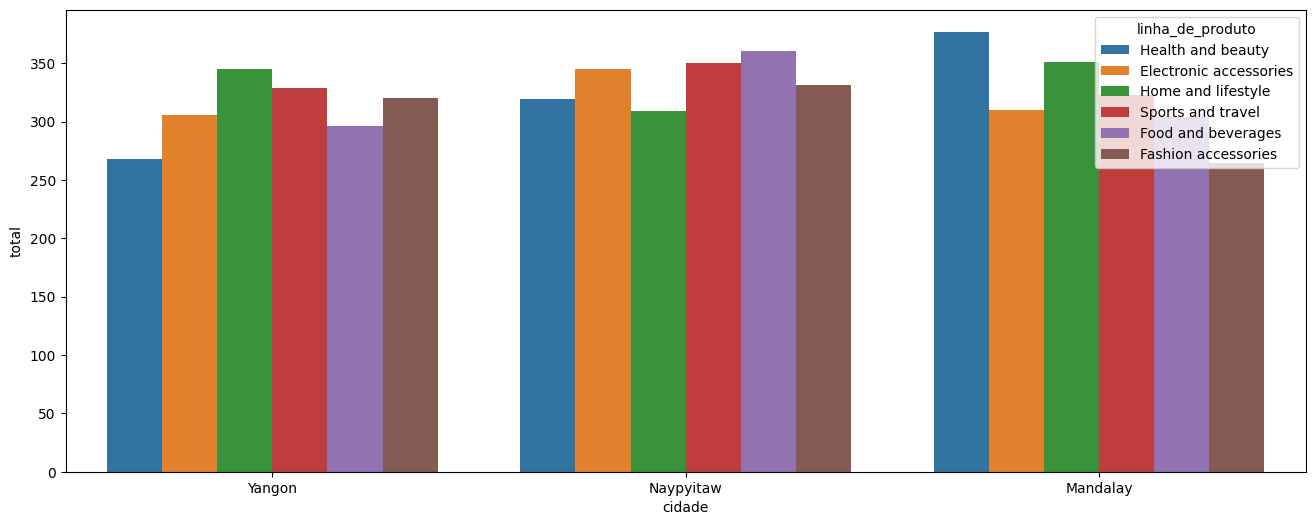

In [16]:
plt.subplots(figsize=(16,6))
sns.barplot(data=df, 
            x= "cidade", 
            y= "total", 
            estimator= "mean",
            hue= "linha_de_produto",
            errorbar=None);

In [17]:
#Representativide de vendas por cidade e linha de produto
represente = df.groupby("linha_de_produto")["total"].sum() / df.groupby("linha_de_produto")["total"].sum().sum() * 100
represente

linha_de_produto
Electronic accessories    16.824497
Fashion accessories       16.814702
Food and beverages        17.384094
Health and beauty         15.231828
Home and lifestyle        16.677232
Sports and travel         17.067648
Name: total, dtype: float64

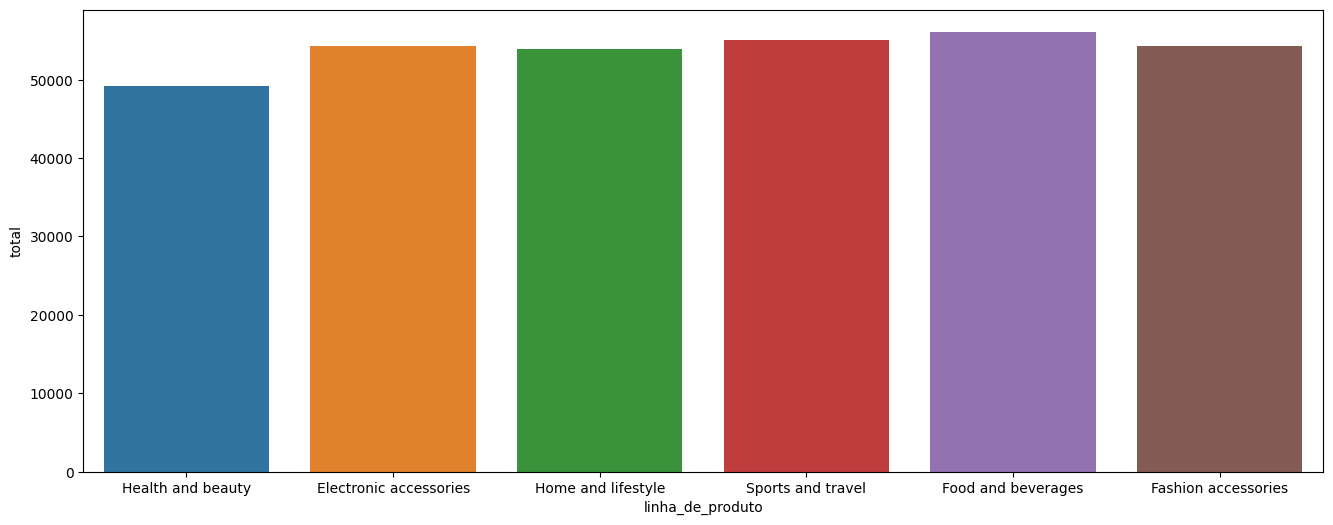

In [18]:
# Total de vendas por linha de produto
plt.subplots(figsize=(16,6))
sns.barplot(data = df, x = "linha_de_produto", y = "total", estimator= "sum", errorbar=None);
